5 is arbitrary cutoff

P/E / earnings metrics are of the previous year, while the price is current

In [5]:
#imports

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np 
import math

In [6]:
def pull_stocks(year:int, full_df, filter=None):

    df = full_df[(full_df['ca_finance1_year'] == year)]
    df = df.drop_duplicates('ca_company_name')
    df['P/E'] = df['P/E'].astype('float')
    df = df[df['P/E'] >= 5]
    if filter != None:
        df = df.sort_values('MCAP',ascending=False)
        df = df.head(filter)
    df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'] = df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'].astype('float')
    df = df[df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'] >= 25]
    df = df.sort_values('P/E',ascending=True)

    return df['ca_company_name']

def pull_stocks_score(year:int, full_df, filter=None):

    df = full_df[(full_df['ca_finance1_year'] == year)]
    df = df.drop_duplicates('ca_company_name')
    df['P/E'] = df['P/E'].astype('float')
    df = df[df['P/E'] >= 5]
    if filter != None:
        df = df.sort_values('MCAP',ascending=False)
        df = df.head(filter)

    df['P/E'] = df['P/E'].astype('float')
    
    df = df.sort_values('P/E',ascending=True)
    df['P/E_Rank'] = df['P/E'].rank(method='dense')

    df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'] = df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'].astype('float')

    df = df.sort_values('ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval',ascending=False)
    df['ROA_Rank'] = df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'].rank(method='dense')

    df['Score'] = df['ROA_Rank'] + df['P/E_Rank']
    df = df.sort_values('Score',ascending=True)

    return df['ca_company_name']


def pull_stocks_evebit(year:int, full_df, filter=None):

    df = full_df[(full_df['ca_finance1_year'] == year)]
    df = df.drop_duplicates('ca_company_name')
    df['EV/EBIT'] = df['EV/EBIT'].astype('float')  # substitute 'EV/EBIT' for 'P/E'
    df = df[df['EV/EBIT'] >= 5]                  # substitute 'EV/EBIT' for 'P/E'
    if filter != None:
        df = df.sort_values('MCAP',ascending=False)
        df = df.head(filter)

    df['EV/EBIT'] = df['EV/EBIT'].astype('float')   # substitute 'EV/EBIT' for 'P/E'
    
    df = df.sort_values('EV/EBIT',ascending=True)   # substitute 'EV/EBIT' for 'P/E'
    df['EV/EBIT_Rank'] = df['EV/EBIT'].rank(method='dense')   # substitute 'EV/EBIT' for 'P/E' and 'EV/EBIT_Rank' for 'P/E_Rank'
    
    df['ca_pat_net_of_pe_pc_avg_capital_employed'] = df['ca_pat_net_of_pe_pc_avg_capital_employed'].astype('float')

    df = df.sort_values('ca_pat_net_of_pe_pc_avg_capital_employed',ascending=False)
    df['ROCE_Rank'] = df['ca_pat_net_of_pe_pc_avg_capital_employed'].rank(method='dense')

    df['Score'] = df['ROCE_Rank'] + df['EV/EBIT_Rank']
    df = df.sort_values('Score',ascending=True)

    return df['ca_company_name']


def pull_stocks_evebitda(year:int, full_df, filter=None):

    df = full_df[(full_df['ca_finance1_year'] == year)]
    df = df.drop_duplicates('ca_company_name')
    df['EV/EBITDA'] = df['EV/EBITDA'].astype('float')  # substitute 'EV/EBIT' for 'P/E'
    df = df[df['EV/EBITDA'] >= 5]                  # substitute 'EV/EBIT' for 'P/E'
    if filter != None:
        df = df.sort_values('MCAP',ascending=False)
        df = df.head(filter)

    df['EV/EBITDA'] = df['EV/EBITDA'].astype('float')   # substitute 'EV/EBIT' for 'P/E'
    
    df = df.sort_values('EV/EBITDA',ascending=True)   # substitute 'EV/EBIT' for 'P/E'
    df['EV/EBITDA_Rank'] = df['EV/EBITDA'].rank(method='dense')   # substitute 'EV/EBIT' for 'P/E' and 'EV/EBIT_Rank' for 'P/E_Rank'
    
    df['ca_pat_net_of_pe_pc_avg_capital_employed'] = df['ca_pat_net_of_pe_pc_avg_capital_employed'].astype('float')


    df = df.sort_values('ca_pat_net_of_pe_pc_avg_capital_employed',ascending=False)
    df['ROCE_Rank'] = df['ca_pat_net_of_pe_pc_avg_capital_employed'].rank(method='dense')

    df['Score'] = df['ROCE_Rank'] + df['EV/EBITDA_Rank']
    df = df.sort_values('Score',ascending=True)

    return df['ca_company_name']


def pull_stocks_roce(year:int, full_df, filter=None):

    #Removing P/Es < 5 makes this return only financial stocks

    df = full_df[(full_df['ca_finance1_year'] == year)]
    df = df.drop_duplicates('ca_company_name')
    df = df[df['P/E'] >= 5]
    if filter != None:
        df = df.sort_values('MCAP',ascending=False)
        df = df.head(filter)

    df['P/E'] = df['P/E'].astype('float')
    
    df = df.sort_values('P/E',ascending=True)
    df['P/E_Rank'] = df['P/E'].rank(method='dense')

    df['ca_pat_net_of_pe_pc_avg_capital_employed'] = df['ca_pat_net_of_pe_pc_avg_capital_employed'].astype('float')


    df = df.sort_values('ca_pat_net_of_pe_pc_avg_capital_employed',ascending=False)
    df['ROCE_Rank'] = df['ca_pat_net_of_pe_pc_avg_capital_employed'].rank(method='dense')

    df['Score'] = df['ROCE_Rank'] + df['P/E_Rank']
    df = df.sort_values('Score',ascending=True)

    return df['ca_company_name']


def pull_random(year:int, full_df, filter=None):

    df = full_df[(full_df['ca_finance1_year'] == year)]
    df = df.drop_duplicates('ca_company_name')
    #df = df[df['P/E'] >= 5]
    if filter != None:
        df = df.sort_values('MCAP',ascending=False)
        df = df.head(filter)

    #df = df.sample(frac=1, random_state=6).reset_index()
    df = df.sample(frac=1).reset_index()
    return df['ca_company_name']

def calc_return(year:int, stock_list, df, interval:int):
    assert year < 2022 #we don't have data beyond this

    next_year = year+interval

    ret_list=[]

    for stock in stock_list:
        try:
            curr = df.loc[str(stock), str(year)]
            next_price = df.loc[str(stock), str(next_year)]
        except:
            print(stock, "not in the prices database")
            continue
        if (math.isnan(curr)  or math.isnan(next_price)):
            continue
        ret_list.append((next_price-curr)/curr)
    
    

    return ret_list


#Not working atm, scrip name differences between the databases
def fin_util_stocks(nifty_500:pd.DataFrame):

    fin_util = nifty_500[nifty_500.Industry == 'Financial Services']
    fin_list = [stock.upper() for stock in list(fin_util['Company Name'])]
    return fin_list

##Not Used and wrong
#def yearly_return_calc(ret_list):

    year_end_val = [1+ret for ret in ret_list]
    final_val = sum(year_end_val)

    ret_percent = (final_val - len(year_end_val)) / len(year_end_val)

    return ret_percent

In [7]:
def calculate_cagr(returns:list, interval:int):
    n = len(returns)
    
    multiplier = 1
    start_value = 100
    for i in range(n):
        multiplier *= (1+ returns[i])


    end_value = start_value * multiplier
    
    cagr = (end_value / start_value)**(1/n) - 1
    return cagr / interval

In [8]:
def fin_stocks(df):
    financial_services = ['Asset management services (mutual funds)', 
        'Banking services', 
        'Diversified financial services', 
        'Housing finance services', 
        'Infrastructure finance services', 
        'Infrastructure investment trusts',
        'Other asset financing services',
        'Other fund based financial services',
        'Other fee based financial services',
        'Other financial services',
        'Securities broking',
        'Crude oil & natural gas',
        'Electricity distribution',
        'Electricity transmission',
        'Renewable electricity',
        'Coal & lignite',
        'Conventional electricity',
        'Infrastructural construction',
        'Natural gas trading & distribution',
        
        ]

    fin_comps = []
    for i in range(len(df)):
        if df.loc[i,'co_industry_name'] in financial_services:
            fin_comps.append(df.loc[i,'company_name'])


    return list(fin_comps)

In [9]:
def open_files():
    #output_df_inp = pd.read_excel('/Users/sam/Documents/Coding/ML4Econ/Back_test/output_all_2.xlsx', engine='openpyxl', dtype='str')
    output_df_inp = pd.read_csv('all_comps_ev.csv') 
    price_df_inp = pd.read_csv('yearwisestockprice.csv')

    #This could be trouble

    price_df_inp.set_index('company_name',inplace=True)
    fin_df_inp = fin_stocks(pd.read_csv(r'/Users/sam/Documents/Coding/RefScreening/identity/id_data.txt', sep='|'))
    return (output_df_inp, price_df_inp, fin_df_inp)

In [10]:
input_tup = open_files()

In [11]:

#Evaluations
def evaluate_strategy(pull_strategy, start=0, top_x=5, verbose=True, filter=None, input_tup = input_tup, remove_fin=False, interval=1,ret_yearly=False):

    

    #df = pd.read_excel('/Users/sam/Documents/Coding/ML4Econ/Back_test/output_all_2.xlsx', engine='openpyxl', dtype='str')
    df = input_tup[0]
    
    def convert_to_numeric(col):
        return pd.to_numeric(col, errors='coerce')

    df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'] = df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'].apply(convert_to_numeric)


#OPEN THE NEXT DF
    #price_df = pd.read_excel('/Users/sam/Documents/Coding/ML4Econ/Back_test/stock_prices_yearwise.xlsx', engine='openpyxl')
    price_df = input_tup[1]
    #price_df.set_index('Stock',inplace=True)

    yearly_returns = []
    fin_stocks = input_tup[2]

    #fin_stocks = [stock.upper() for stock in fin_stocks]

    for i in range(2005,2023-interval,1):
        l = pull_strategy(i, df, filter=filter)
        #print(f'Length of the initial sample: {len(l)}')
        if remove_fin:
            l = [elem for elem in l if elem not in fin_stocks]
        #print(f'Length after filtering for fin_stocks: {len(l)}')
        #print(l)
        l = l[start:top_x]
        if verbose:
            print(f'Year: {i}\nStocks: {list(l)}')
            print(f'Return: {np.mean(calc_return(i,l,price_df,interval=interval)) * 100} %')
        yearly_returns.append(np.mean(calc_return(i,l,price_df,interval=interval)))
        
    cagr = calculate_cagr(yearly_returns, interval=interval)

    if verbose:
        print('---------------------------------------------')
        print(f"17 Year CAGR: {cagr *100}")
    if ret_yearly:
        return (cagr *100), yearly_returns
    else: return (cagr *100)

In [135]:
_ = evaluate_strategy(pull_strategy=pull_stocks_evebit,start=0,top_x=20,verbose=True, filter=1500,input_tup=input_tup,remove_fin=True,interval=1)

Year: 2005
Stocks: ['SAGAR CEMENTS LTD.', 'SHAW WALLACE & CO. LTD. [MERGED]', 'DION GLOBAL SOLUTIONS LTD.', 'WEIZMANN LTD.', 'J S W ISPAT STEEL LTD. [MERGED]', 'STATE TRADING CORPN. OF INDIA LTD.', 'MUKAND LTD.', 'BHUWALKA STEEL INDS. LTD.', 'ANSAL BUILDWELL LTD.', 'AMRUTANJAN HEALTH CARE LTD.', 'ZENITH STEEL PIPES & INDS. LTD.', 'SUPER TANNERY LTD.', 'CAROL INFO SERVICES LTD.', 'VADILAL INDUSTRIES LTD.', 'T I L LTD.', 'SAI SERVICE PVT. LTD.', 'I F B AGRO INDS. LTD.', 'USHA MARTIN LTD.', 'HITKARI INDUSTRIES LTD.', 'RAGHAV INDUSTRIES LTD.']
Return: 155.89875015705974 %
Year: 2006
Stocks: ['STATE TRADING CORPN. OF INDIA LTD.', 'LUDLOW JUTE & SPECIALITIES LTD.', 'ZENITH STEEL PIPES & INDS. LTD.', 'MUKAND LTD.', 'SAI SERVICE PVT. LTD.', 'SUPERHOUSE LTD.', 'VADILAL INDUSTRIES LTD.', 'INDOKEM LTD.', 'LAHOTI OVERSEAS LTD.', 'BAFFIN ENGINEERING PROJECTS LTD.', 'C G-V A K SOFTWARE & EXPORTS LTD.', 'AMBALAL SARABHAI ENTERPRISES LTD.', 'SOMANY CERAMICS LTD.', 'PATANJALI FOODS LTD.', 'SUPER TANNER

In [13]:
test_df = input_tup[0]

In [14]:
'ER' in set(test_df['ca_pat_net_of_pe_pc_avg_tot_asset_net_menow_reval'])

False

In [15]:
k=20
for i in range(0,300,k):
    print(evaluate_strategy(pull_strategy=pull_stocks_evebit,start=i,top_x=i+k,verbose=False, filter=750,input_tup=input_tup, remove_fin=True,interval=1))


13.887507770940278
18.394561973718094
22.930352088925332
16.385899928110504
20.773202038633197
17.60711491512548
14.157265322657263
19.39398388948572
19.882805232042667
11.542205773428327
8.695475316842693
9.785920607519326
6.7954100215701585
6.311748473625345
5.786637970780029


In [16]:
sns.set_palette('coolwarm')
sns.set_style("whitegrid", {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size':12, 'lines.linewidth':2})

In [98]:
y = []
x = []
k = 20
ps = pull_stocks_evebit
for i in range(0,380,k):
#for i in range(0,380,k):
    #print(f'Index: {i, i+k}')
    y.append(evaluate_strategy(pull_strategy=ps,start=i,top_x=i+k,verbose=False, filter=1500,remove_fin=True,interval=1))
    #print('================================================')
    x.append(i)

In [99]:
y

[19.4483134242458,
 14.251246971110376,
 25.088251253325833,
 21.73627209027371,
 20.850219008220282,
 23.36244070951814,
 17.941849071736105,
 19.97729414198306,
 16.91019626659451,
 21.18043865643482,
 12.013344407413328,
 12.685611729472024,
 12.966969752603074,
 14.9898215291125,
 12.748391693281679,
 5.586993334377777,
 10.35983288050042,
 13.973498536929618,
 3.6591409240564587]

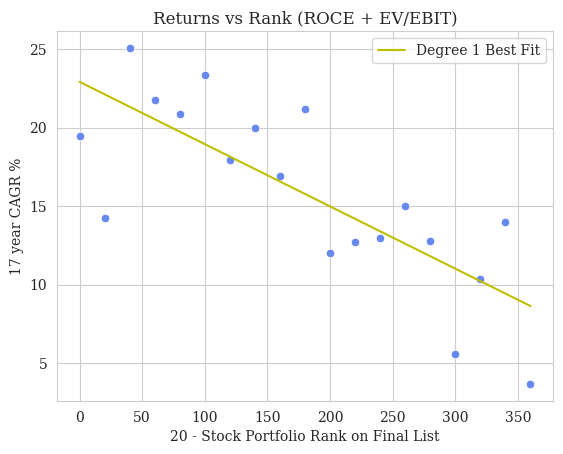

In [131]:
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
#p2 = np.poly1d(np.polyfit(x, y, 3))
sns.scatterplot(x=x, y=y)
plt.ylabel('17 year CAGR %')
plt.xlabel(f'{k} - Stock Portfolio Rank on Final List')
plt.title('Returns vs Rank (ROCE + EV/EBIT)')
plt.plot(x, p(x), color='y', label ='Degree 1 Best Fit')
#plt.plot(x, p2(x), color='c', label = 'degree 3 best fit')
#plt.axhline(y=13, linestyle='--', color='r', label = 'Nifty50')

plt.legend()

In [101]:
Y = y
X = np.array(x)
#X = np.column_stack((x))
X = sm.add_constant(X)
mod = sm.OLS(Y,X, missing='drop')
res = mod.fit(cov_type='HC3')
res.summary()

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     13.54
Date:                Wed, 05 Apr 2023   Prob (F-statistic):            0.00186
Time:                        13:50:17   Log-Likelihood:                -51.023
No. Observations:                  19   AIC:                             106.0
Df Residuals:                      17   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9235      2.265     10.120      0.000      18.484      27.363
x1            -0.0397      0.011     -3.680      0.000      -0.061      -0.019
==============================================================================
Omnibus:                        1.128   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.968
Skew:                          -0.490   Prob(JB):                        0.616
Kurtosis:                       2.489   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [69]:
np.mean(Y), np.std(Y)

(15.920072013439645, 6.310996079762921)

In [22]:
(17000 / 2000)**(1/17) - 1

0.13415314525329158

In [23]:
Y

[16.892810013054937,
 25.955492581475603,
 24.434570047516324,
 18.78713154813807,
 10.231856761130164,
 11.589176642734156,
 8.973756482608476,
 3.455109632680675,
 19.10859648922294,
 12.299827743753756,
 8.302684188669197,
 16.65348543975409,
 3.788835867163809,
 4.298103556798094,
 5.194849961238646,
 8.859651989918538,
 4.39693552133702]

In [24]:
#this is 2005 to 2001 - https://stableinvestor.com/2018/01/nifty-annual-yearly-returns-historical.html
nifty_yearly = [36.3, 39.8, 54.8, -51.8, 75.8, 17.9, -24.6, 27.7, 6.8, 31.4, -4.1, 3, 28.6, 3.2, 12, 14.9, 24.1]
nifty_yearly = np.array(nifty_yearly)
nifty_yearly = nifty_yearly/100

In [25]:
gdp_growth = [7.9234,
8.0607,
7.6608,
3.0867,
7.8619,
8.4976,
5.2413,
5.4564,
6.3861,
7.4102,
7.9963,
8.2563,
6.7954,
6.4539,
3.7379,
-6.5961,
8.6812]

change_gdp = [0,
0.14,
-0.4,
-4.57,
4.78,
0.64,
-3.26,
0.22,
0.93,
1.02,
0.59,
0.26,
-1.46,
-0.34,
-2.72,
-10.33,
15.28]

gdp_growth = np.array(gdp_growth)
change_gdp = np.array(change_gdp)

In [26]:
years = range(2005,2022,1)

In [27]:
calculate_cagr(nifty_yearly, 1)

0.13285582098796

In [105]:
res = evaluate_strategy(pull_strategy=pull_stocks_evebit,start=0,top_x=20,verbose=False, filter=1500,input_tup=input_tup,remove_fin=True,interval=1, ret_yearly=True)

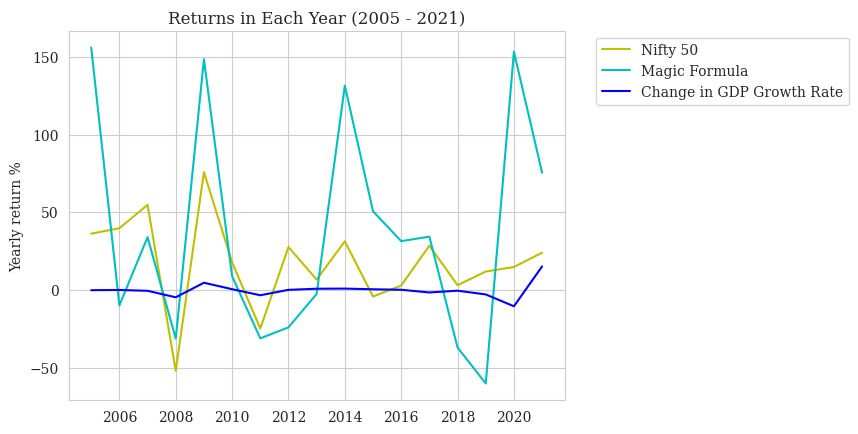

In [136]:
plt.plot(years, nifty_yearly*100, color='y', label ='Nifty 50')
plt.plot(years, np.array(res[1])*100, color='c', label = 'Magic Formula')
plt.plot(years, change_gdp, color='b', label = 'Change in GDP Growth Rate')
plt.title('Returns in Each Year (2005 - 2021)')
plt.ylabel('Yearly return %')

legend = plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

# Create offset from lower right corner of legend box
#offset = matplotlib.text.OffsetFrom(legend, (1.0, 0.0))
# Create annotation with text below the offset point
#plt.annotate("We can see the Magic Formula seems to generate the most upside in 2005, 2009, 2014 and 2020.", xy=(0, 0), xycoords='figure fraction',
#            xytext=(0, -20), textcoords=offset,
#            horizontalalignment='right', verticalalignment='top')
plt.show()
#plt.legend()

In [120]:
np.std(nifty_yearly), np.std(res[1])

(0.2840113916522281, 0.6986691354277871)

In [60]:
calculate_cagr(nifty_yearly,1), calculate_cagr(res[1],1)

(0.13285582098796, 0.194483134242458)

In [61]:
#Beta calc
np.cov(nifty_yearly,res[1])[0][1] / np.std(nifty_yearly) **2

1.3597644313900261

In [33]:
res[1]

[0.6514598563715996,
 0.053041907289323544,
 0.27234613615142583,
 -0.44064485780158597,
 6.424609620462306,
 -0.1557493905336046,
 0.0010075495601133966,
 -0.047880644830581486,
 0.18477939139530133,
 1.233147740753136,
 -0.15995450634858102,
 0.23606130384329554,
 0.21430096140577606,
 -0.33774795427785287,
 -0.38467100186390435,
 0.7664052353729661,
 0.29006585025406784]

In [34]:
#excluding the crazy 642% year - only returns of 7%
calculate_cagr([0.6514598563715996,
 0.053041907289323544,
 0.27234613615142583,
 -0.44064485780158597,
 -0.1557493905336046,
 0.0010075495601133966,
 -0.047880644830581486,
 0.18477939139530133,
 1.233147740753136,
 -0.15995450634858102,
 0.23606130384329554,
 0.21430096140577606,
 -0.33774795427785287,
 -0.38467100186390435,
 0.7664052353729661,
 0.29006585025406784],1), calculate_cagr(res[1],1)

(0.07294876266879169, 0.20225423359000416)